In [1]:
import pandas as pd 
import matplotlib as mp
import numpy as np


## Create Dataset of previous Smester Grades And Upload as CSV file ##

In [2]:
df=pd.read_csv("MyPerformance.csv")
df.head()

,Courses,core,semester,cradit hours,Lab,Teacher,PreReq,Grade
0,English 1,1,1,2,0,0,0,medium
1,Islamiat 1,1,1,2,0,1,0,good
2,Calculus1,1,1,3,0,0,0,medium
3,A Mechanics,1,1,4,1,0,0,medium
4,Intro to Comp,1,1,3,1,0,0,good


In [3]:
df.describe()

,core,semester,cradit hours,Lab,Teacher,PreReq
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000
mean,0.857143,3.542857,3.000000,0.20000,0.257143,0.571429
std,0.355036,1.737863,0.485071,0.40584,0.443440,0.502096
min,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,3.000000,0.00000,0.000000,0.000000
50%,1.000000,4.000000,3.000000,0.00000,0.000000,1.000000
75%,1.000000,5.000000,3.000000,0.00000,0.500000,1.000000
max,1.000000,6.000000,4.000000,1.00000,1.000000,1.000000


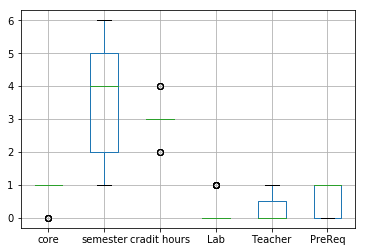

In [23]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024254F6F4A8>,
      dtype=object)

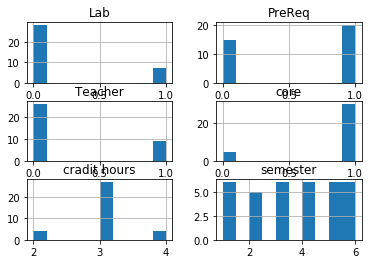

In [5]:
df.hist()

## Creating label for training models and prediction

In [6]:
label=[]

In [7]:
label=df['Grade']

In [8]:
df = df.drop(['Grade'], axis = 1)

In [9]:
df=df.drop(['Courses'], axis = 1)

In [10]:
df

,core,semester,cradit hours,Lab,Teacher,PreReq
0,1,1,2,0,0,0
1,1,1,2,0,1,0
2,1,1,3,0,0,0
3,1,1,4,1,0,0
4,1,1,3,1,0,0
5,1,1,3,1,0,0
6,0,2,3,0,1,0
7,1,2,2,0,1,1
8,1,2,2,0,1,1
9,1,2,4,1,0,1


## UpLoad Test Data to pridict

In [11]:
ts=pd.read_csv('TestData.csv')
ts=ts.drop(['Courses'], axis=1)
ts=ts.drop(['Grade'], axis=1)
ts

,core,semester,cradit hours,Lab,Teacher,PreReq
0,0,7,3,0,0,1
1,0,7,3,0,1,0
2,0,7,3,0,1,0
3,1,7,3,0,1,0
4,1,7,3,0,1,0


## Import libraries of models From sklearn ##

In [12]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

C:\Users\SAAD\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Split Data into XTrain,Xtest and YTrain, Ytest 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.2, random_state = 14)

## List of Classifiers

In [17]:
classifiers=[
    KNeighborsClassifier(3),
    SVC(kernel='rbf',C=0.35, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]
linearReg=LinearRegression()

## Applying Models to train Data of Grades

In [19]:
for modl in classifiers:
    modl.fit(X_train, y_train)
    name = modl.__class__.__name__
    print("="*50)
    print(name)
    
    print('Predicted values')
    train_predictions = modl.predict(X_test)
    print(train_predictions)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

KNeighborsClassifier
Predicted values
['medium' 'medium' 'bad' 'medium' 'medium' 'bad' 'medium']
Accuracy: 57.1429%
SVC
Predicted values
['medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium']
Accuracy: 42.8571%
DecisionTreeClassifier
Predicted values
['medium' 'medium' 'medium' 'medium' 'good' 'bad' 'good']
Accuracy: 42.8571%
RandomForestClassifier
Predicted values
['good' 'medium' 'medium' 'medium' 'medium' 'bad' 'good']
Accuracy: 57.1429%
AdaBoostClassifier
Predicted values
['medium' 'medium' 'medium' 'medium' 'medium' 'bad' 'medium']
Accuracy: 57.1429%
MLPClassifier
Predicted values
['medium' 'medium' 'medium' 'medium' 'good' 'medium' 'medium']
Accuracy: 42.8571%
GradientBoostingClassifier
Predicted values
['medium' 'medium' 'medium' 'medium' 'medium' 'bad' 'good']
Accuracy: 42.8571%
GaussianNB
Predicted values
['good' 'bad' 'good' 'bad' 'good' 'bad' 'good']
Accuracy: 42.8571%
LinearDiscriminantAnalysis
Predicted values
['medium' 'medium' 'medium' 'medium' 'good' 'bad' 'me

C:\Users\SAAD\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Applying Model on testSet 

In [22]:
predict = modl.predict(ts)
print('Predict = {}'.format(predict))

Predict = ['bad' 'good' 'good' 'good' 'good']
